In [1]:
# importing libraries and set standards
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import statistics as stat
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit

plt.rcParams['figure.figsize'] = 21, 15
plt.rcParams['xtick.labelsize']=65
plt.rcParams['ytick.labelsize']=65
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update({'figure.autolayout': False})
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.family'] = 'Arial'

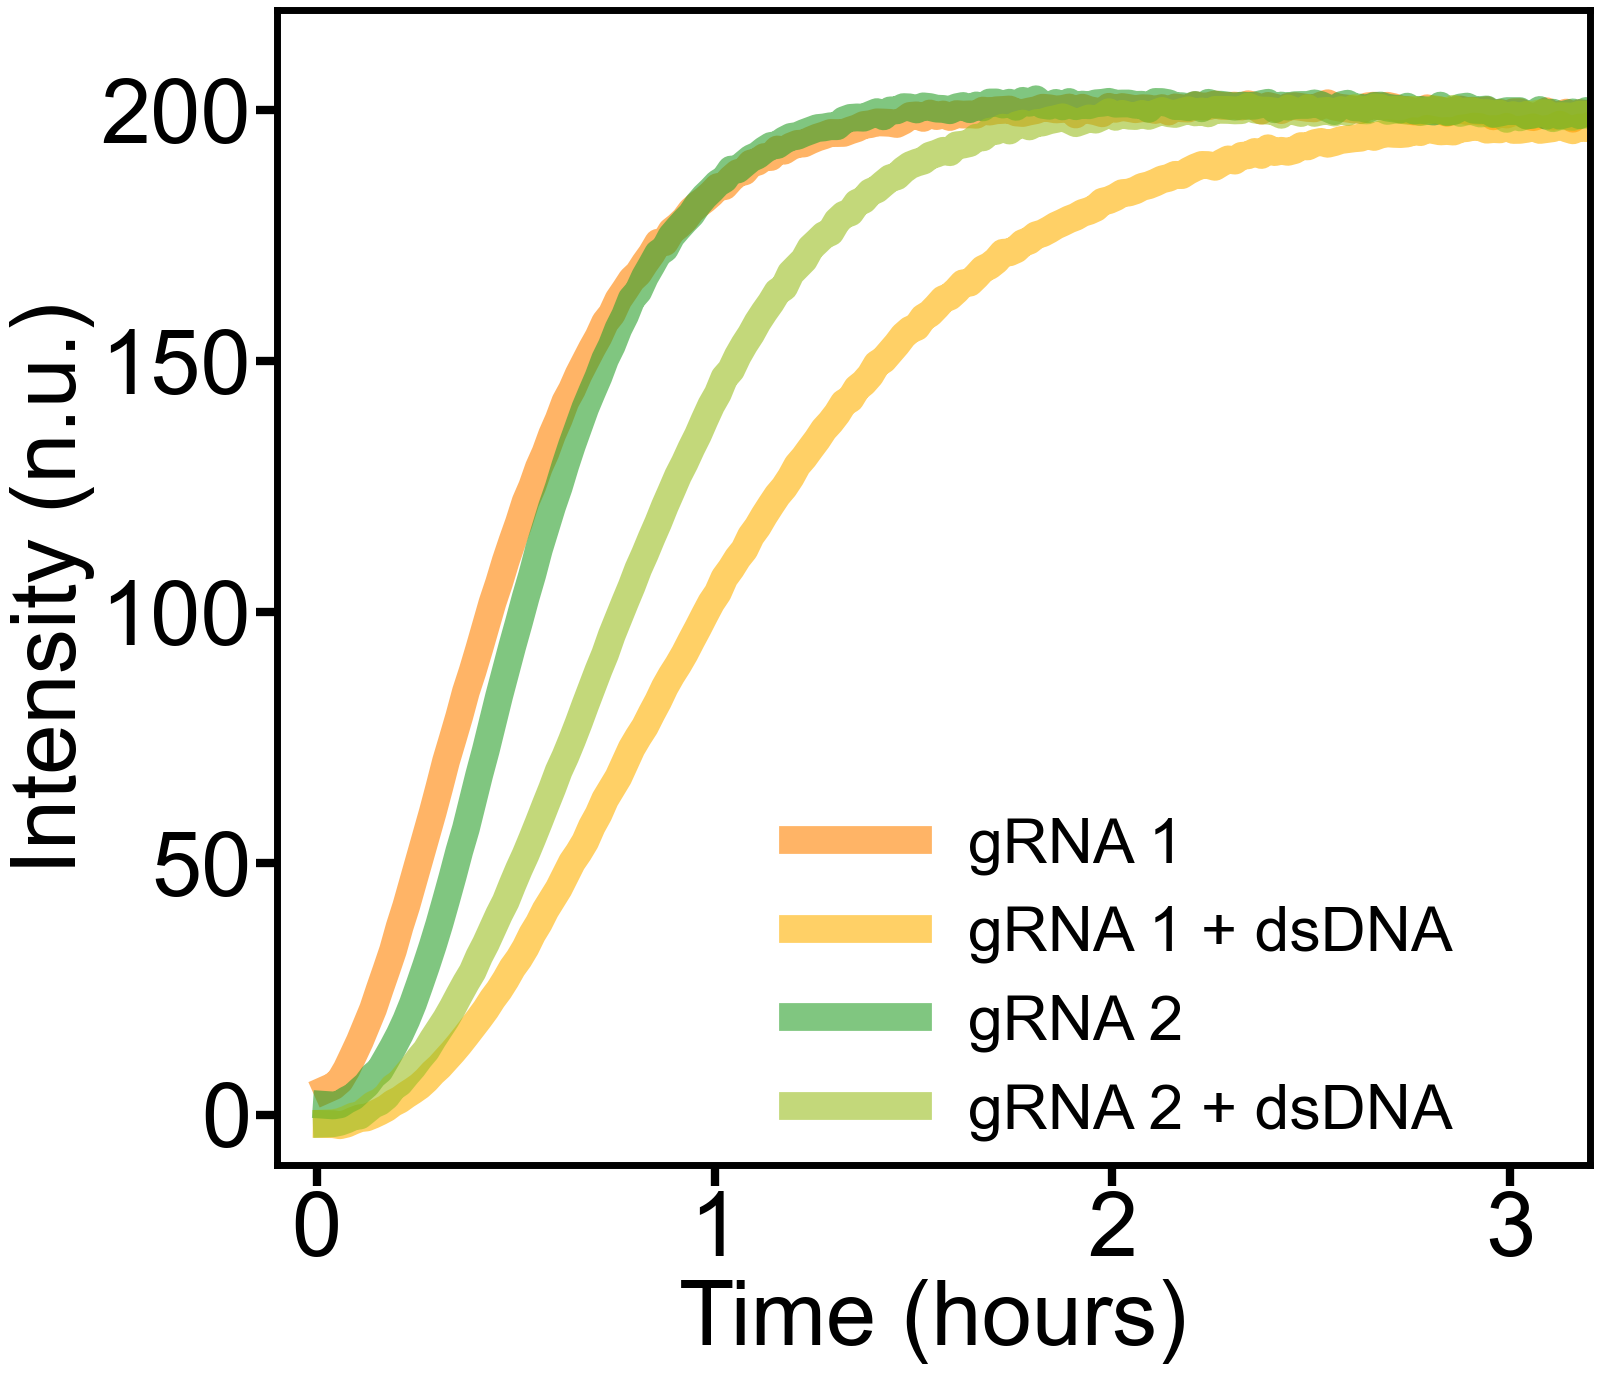

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('Figure1.xlsx')

# Extract time and data columns
time = df.iloc[:, 0] + 90
data = df.iloc[:, 1:]

# Define the columns you want to plot (by index or name), their custom labels, and colors
plot_config = [
    {"col": data.columns[0], "label": "gRNA 1", "color": "#ff8300"},
    {"col": data.columns[2], "label": "gRNA 1 + dsDNA", "color": "#ffb100"},
    {"col": data.columns[1], "label": "gRNA 2 ", "color": "#2ca02c"},
    {"col": data.columns[3], "label": "gRNA 2 + dsDNA", "color": "#9cbf22"},
]

# Plot time against data
fig, ax = plt.subplots()

for cfg in plot_config:
    ax.plot(
        time / 3600,
        data[cfg["col"]],
        label=cfg["label"],
        linewidth=20,
        color=cfg["color"],
        alpha=0.6,
    )

# Axes styling
ax.set_xlim([-0.1, 3.2])
ax.set_ylim([-10, 220])
ax.tick_params(axis='both', which='major', length=15, width=6)

ax.set_xlabel('Time (hours)', fontsize=65)
ax.set_ylabel('Intensity (n.u.)', fontsize=65)

# Move the legend outside the plot on the upper right
ax.legend(loc='upper left', bbox_to_anchor=(0.35, 0.35), fontsize=45, frameon=False)

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.75)

# Save and show the plot
plt.savefig('Figure1-kinetics-teaser.svg', format='svg', dpi=300)
plt.show()


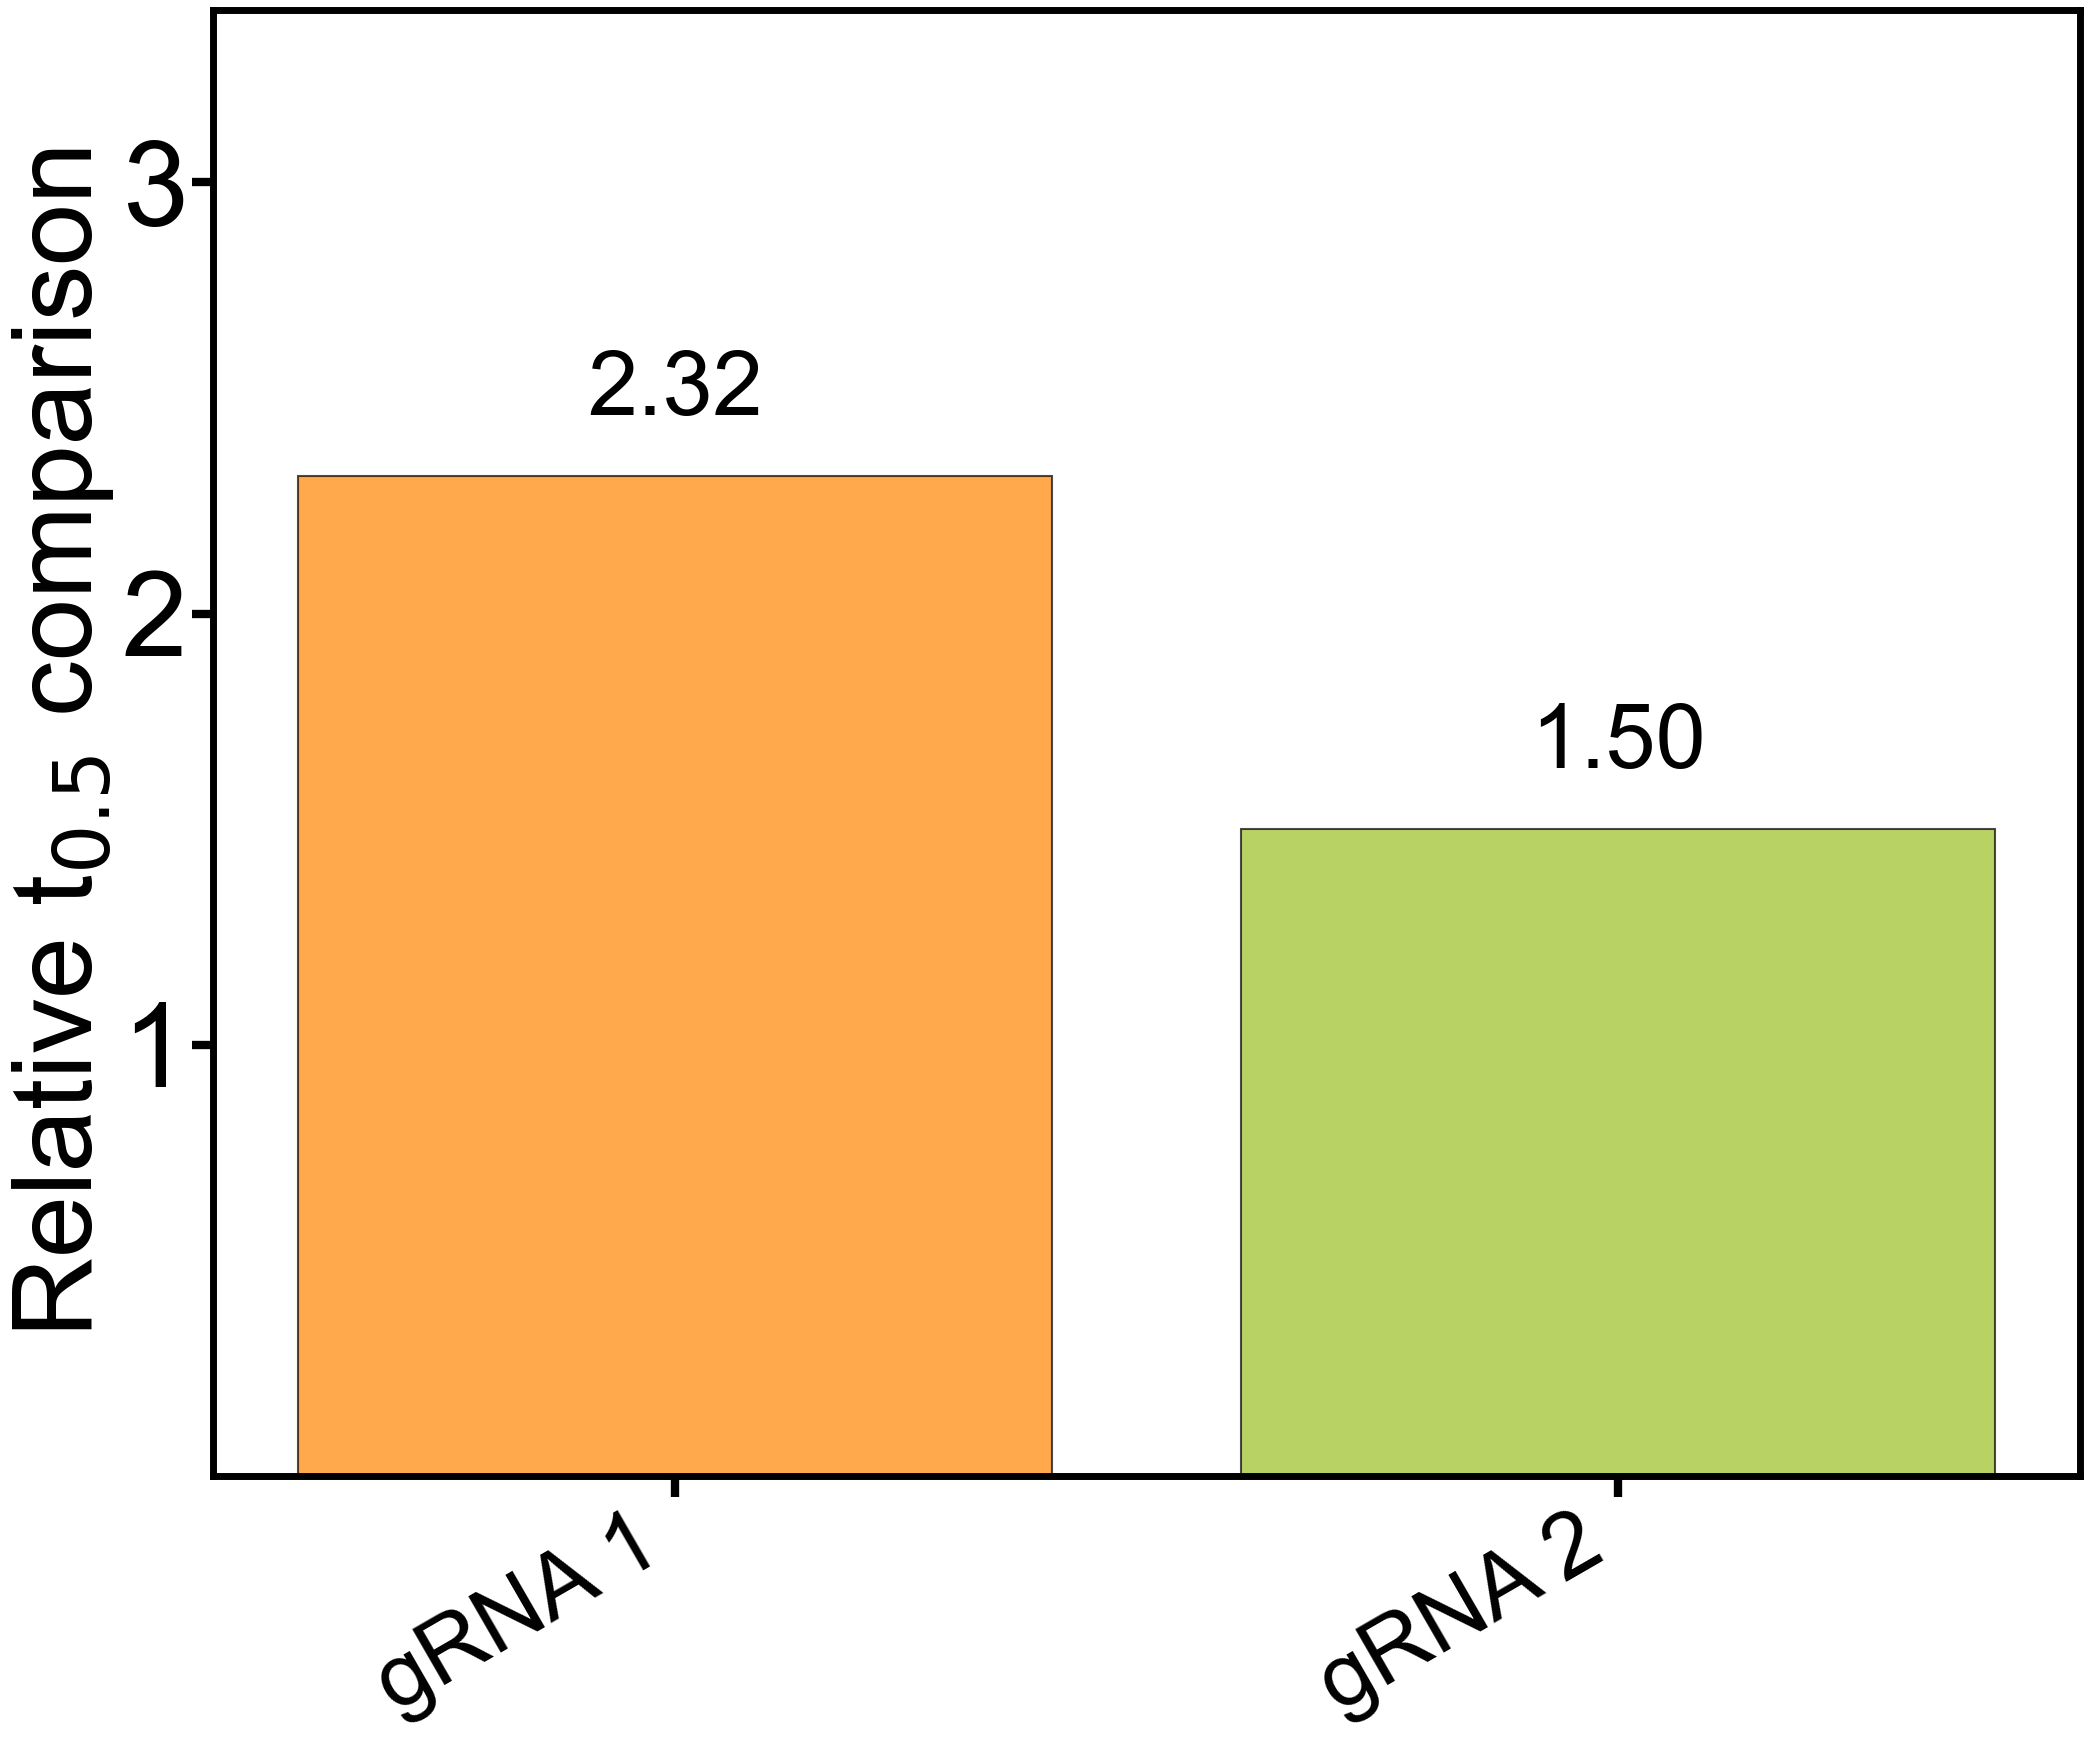

In [3]:
# Load the Excel file
file_path = 'Figure1.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Extract relevant columns (all except 'time')
columns = data.columns[1:]

# Determine when each sample exceeds 100 (include all samples)
times = {}
for col in columns:
    exceeded = data[data[col] > 100]
    if not exceeded.empty:
        times[col.strip()] = exceeded.iloc[0]['time']
    else:
        times[col.strip()] = None

# Normalize each "RNA" sample to its matching non-RNA reference
normalized_results = {}
reference_order = []

for col in columns:
    label = col.strip()
    if "DNA" in label:
        ref_label = label.replace("DNA", "").strip()
        ref_time = times.get(ref_label)
        rna_time = times.get(label)
        if ref_time is not None and rna_time is not None:
            normalized_results[label] = rna_time / ref_time
            if ref_label not in reference_order:
                reference_order.append(ref_label)

# Preserve the order of appearance in the original file
ordered_labels = []
ordered_values = []
for ref in reference_order:
    rna_label = f"{ref} DNA"
    if rna_label in normalized_results:
        ordered_labels.append(rna_label)
        ordered_values.append(normalized_results[rna_label])

# Custom x-axis labels
custom_labels = [
    "gRNA 1", "gRNA 2"]

# Plot
fig, ax = plt.subplots(figsize=(21, 17.5))
bar_colors = ['#ff8300', '#9cbf22']  # Orange für gRNA 1, Blau für gRNA 2


bars = ax.bar(
    custom_labels,
    ordered_values,
    color=bar_colors,
    edgecolor='black',
    linewidth=1.5,
    alpha=0.7
)

# Add values above bars
for bar, value in zip(bars, ordered_values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f"{value:.2f}",
        ha='center',
        va='bottom',
        fontsize=65,
        fontweight='bold'
    )

# Axis and labels
plt.xticks(rotation=30, ha='right', fontsize=65)
plt.yticks(fontsize=65)
plt.ylabel("Relative t$_{0.5}$ comparison", fontsize=80)

# Tick styling

# Set axis limits
ax.set_ylim([0, 3.4])
ax.set_yticks([1, 2, 3])
ax.tick_params(axis='y', labelsize=85) 
ax.tick_params(axis='both', which='major', length=15, width=6)
plt.rcParams['axes.linewidth'] = 5.2

plt.tight_layout()
plt.savefig('Figure1-bars.svg', format='svg', dpi=300)
plt.show()